# Assignment is below. 

In [1]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


from sklearn.linear_model import LogisticRegression as Model

Read in the Kobe Bryant shooting data [https://www.kaggle.com/c/kobe-bryant-shot-selection]

In [2]:
kobe = pd.read_csv('../data/kobe.csv')
kobe.dropna(inplace=True) #discards all na values

In [3]:
list(kobe.columns)

['action_type',
 'combined_shot_type',
 'game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'season',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'shot_type',
 'shot_zone_area',
 'shot_zone_basic',
 'shot_zone_range',
 'team_id',
 'team_name',
 'game_date',
 'matchup',
 'opponent',
 'shot_id']

For now, use just the numerical datatypes. They are below as `num_columns`

In [4]:
kobe.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

In [5]:
kobe.shot_zone_area.value_counts()

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64

In [6]:
kobe.shot_zone_range.value_counts()

Less Than 8 ft.    7857
16-24 ft.          6907
8-16 ft.           5580
24+ ft.            5281
Back Court Shot      72
Name: shot_zone_range, dtype: int64

In [7]:
kobe.shot_zone_basic.value_counts()

Mid-Range                10532
Restricted Area           5932
Above the Break 3         4720
In The Paint (Non-RA)     3880
Right Corner 3             333
Left Corner 3              240
Backcourt                   60
Name: shot_zone_basic, dtype: int64

In [8]:
kobe

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10
10,Jump Shot,Jump Shot,309,20000012,33.8063,-94,238,-118.3638,1,3,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,11
11,Jump Shot,Jump Shot,4,20000019,33.9173,121,127,-118.1488,11,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,12


value counts is the summary of how many of each. Normalize divides it by the sum. Kobe missed 55% of the shots over his career, made 44% of shots. 

In [9]:
kobe.shot_made_flag.value_counts(normalize=True)

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

This is not normalizing the numbers, it shows the total numbers...in this case he took 25,000 shots; making 11,465 shots missing 14,232 shots.

In [10]:
kobe.shot_made_flag.value_counts(normalize=False)

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

In [11]:
num_columns = [col for col, dtype in zip(kobe.columns, kobe.dtypes) if dtype != 'object']
num_columns #brings back columns with numerical values

['game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'team_id',
 'shot_id']

## The `shot_made_flag` is the result (0 or 1) of the shot that Kobe took. Some of the values are missing (e.g. `NaN`) but we *_dropped_* them.

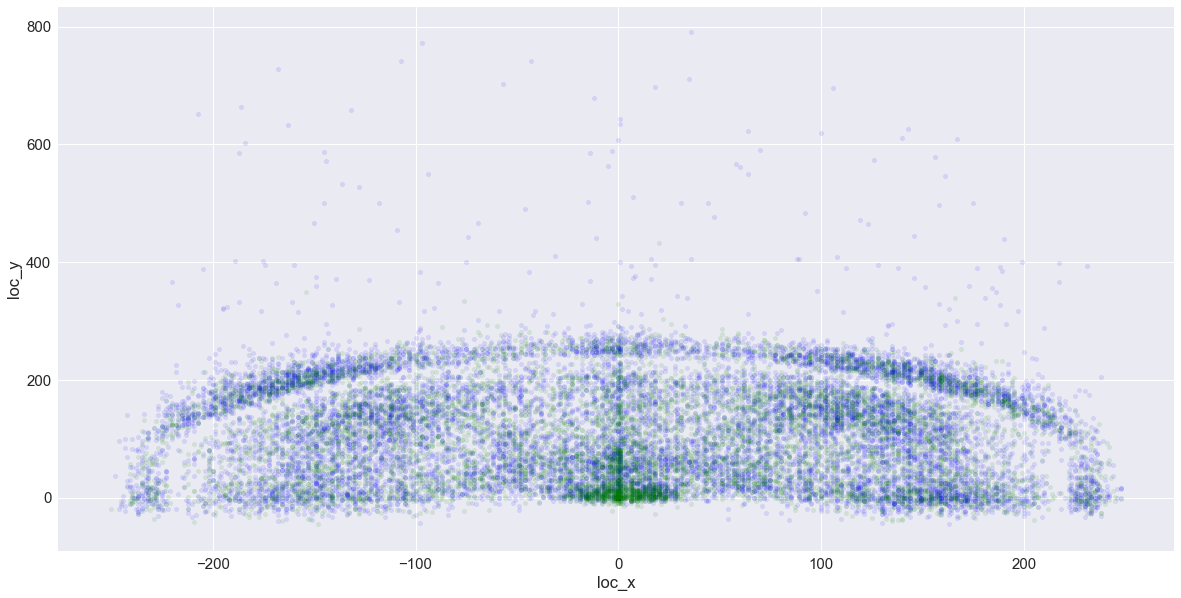

In [12]:
fig, ax = plt.subplots()
kobe[kobe.shot_made_flag==0].plot(kind='scatter', x='loc_x', y='loc_y', color='blue', alpha=0.1, ax=ax)
kobe[kobe.shot_made_flag==1].plot(kind='scatter', x='loc_x', y='loc_y', color='green', alpha=0.1, ax=ax)
# plt.scatter(kobe.loc_x, kobe.loc_y, alpha=0.2)

Blue are shots missed, green shots made. At loc_x, 0 that's the basket.The outer arc is the 3pt line.

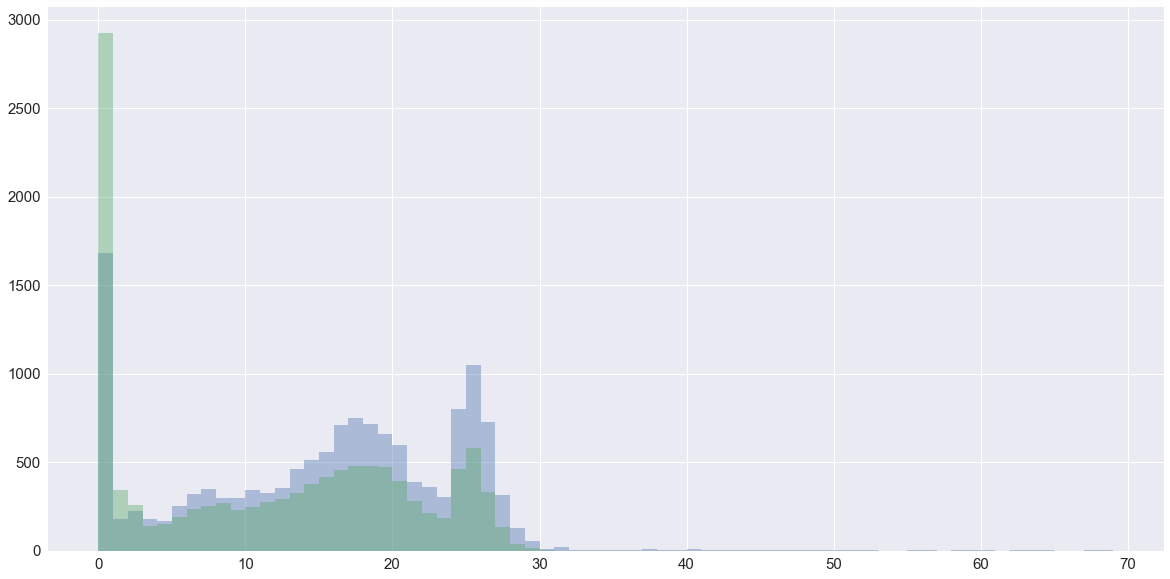

In [13]:
kobe[kobe.shot_made_flag==0].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[kobe.shot_made_flag==1].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

The graph above looks at the shot distance in histogram. See a large amount of shots made by the hoop (1600 missed out of nearly 3000).  

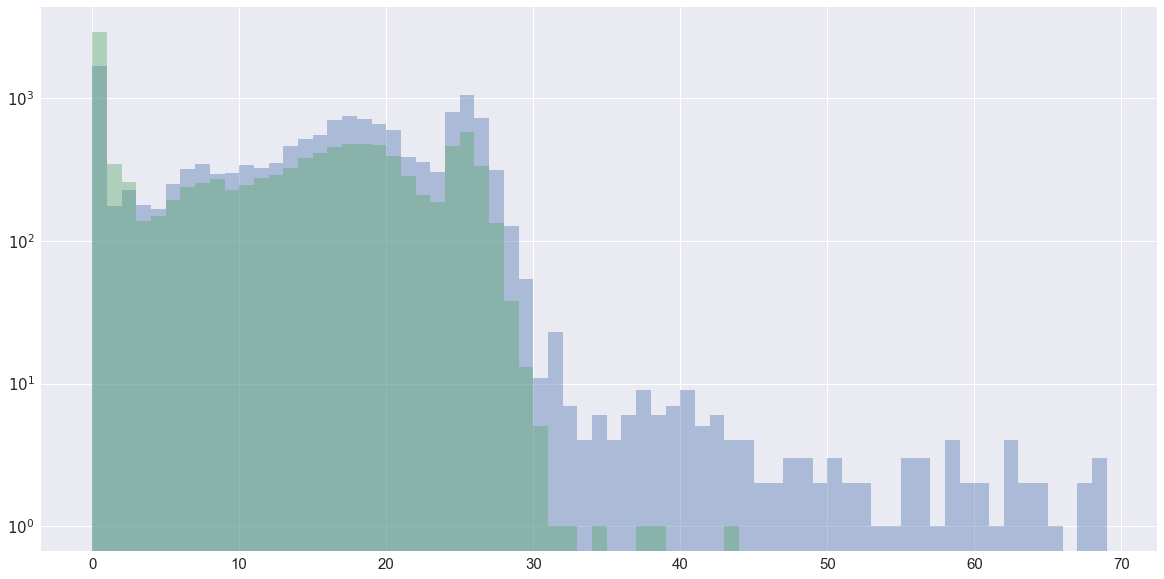

In [14]:
kobe[kobe.shot_made_flag==0].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4, log=True)
kobe[kobe.shot_made_flag==1].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4, log=True)

Placed on a logarithmic scale, helps to see it in relative terms. 

In [15]:
# fit a linear regression model and store the predictions
feature_cols = ['shot_distance', 'minutes_remaining']
X = kobe[feature_cols]
y = kobe.shot_made_flag

model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())


0.59719033350196526

The above code looks at how likely he will make a shot. Minutes remaining tests if there's pressure and how well he performs under that pressure. 

sklearn.linear_model import LogisticRegression as Model (makes the linear regressoin as the model, we can change this to LinearSVC or other types). 
Predictions are stored in "pred".  

Accuracy score shows made or missed our prediction. Our accuracy based on the training (model.predict(X)) was about 59.7%.


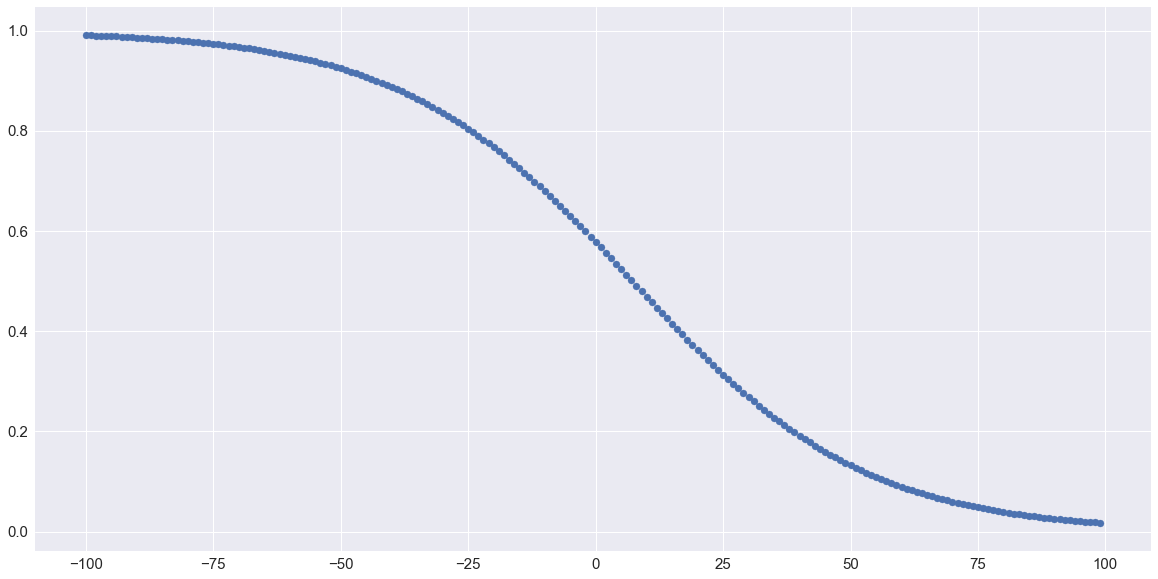

In [16]:
distances = np.arange(-100, 100)
minutes = np.array([0]*200)
x_trial = np.column_stack((distances, minutes))
model.predict_proba(x_trial)
plt.scatter(distances, model.predict_proba(x_trial)[:,1])

Cell above we've created lists for distance and minutes (sigmoid function). "Model.predict" will result in just showing that shots are either at 10 ft or 0.  "Model Predict Proba" shows the range of numbers, as one increases the other decreases, shows the probability of making it [:,1] increases as the distance decreases. 

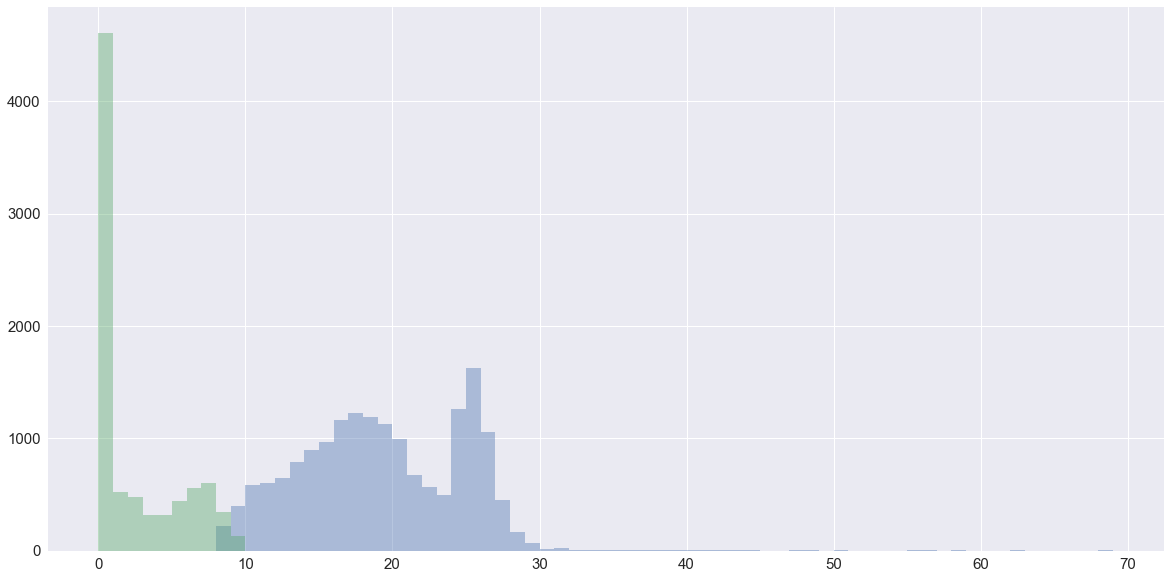

In [17]:
kobe[(kobe.pred==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

The histograms ofthe miss and making it, you can see there's a separation of the values at X=10 (distance).  It's not a great model because it doesn't capture the ones that DO make it at a further distance.

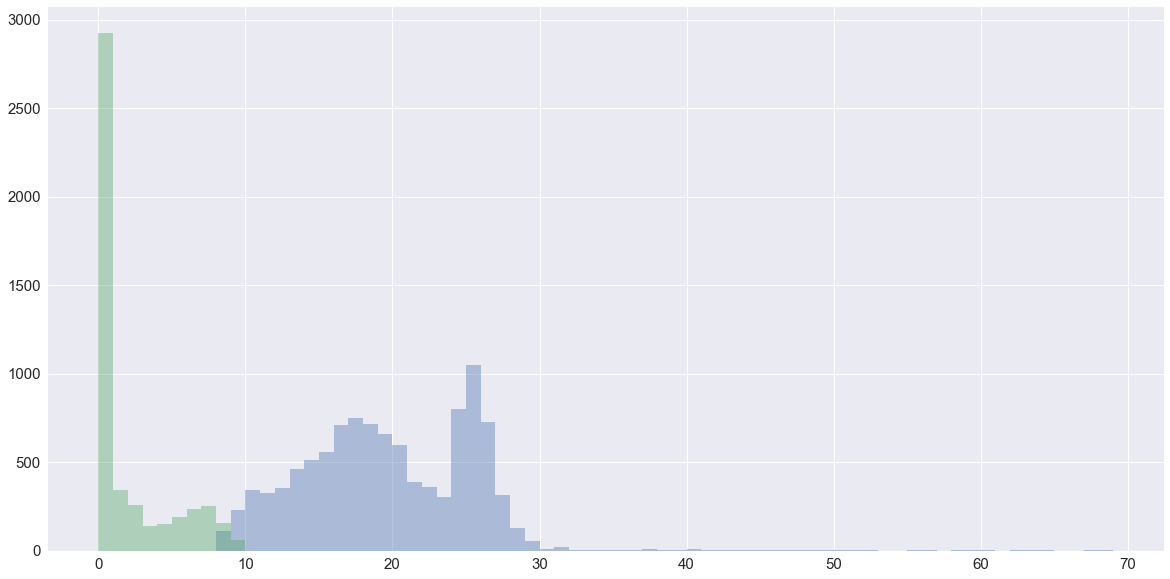

In [18]:
kobe[(kobe.pred==0) & (kobe.shot_made_flag==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1) & (kobe.shot_made_flag==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

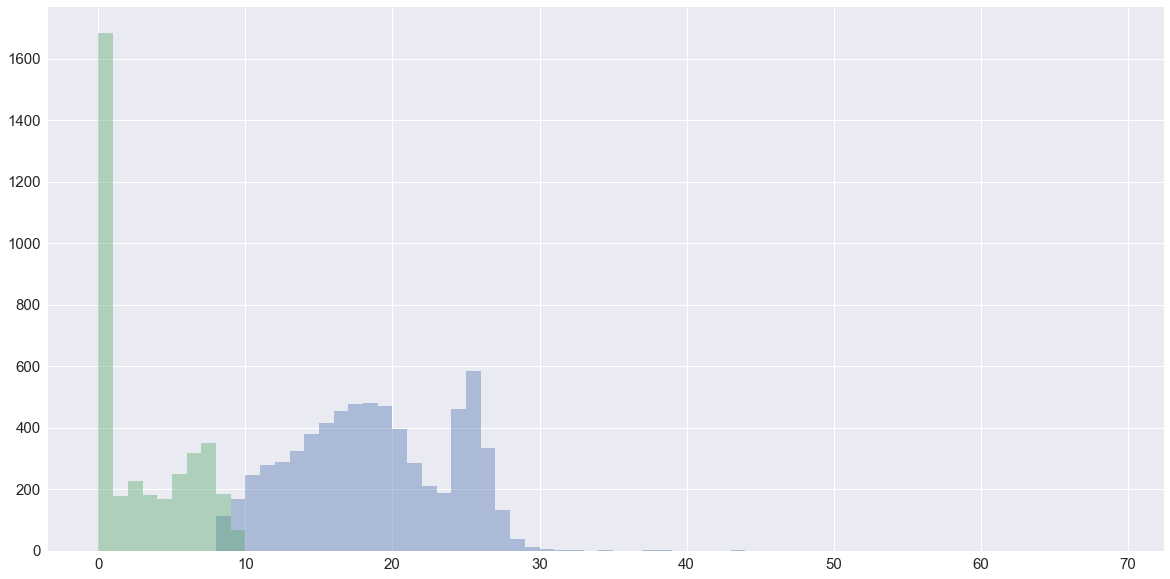

In [19]:
kobe[(kobe.pred==0) & (kobe.shot_made_flag==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1) & (kobe.shot_made_flag==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

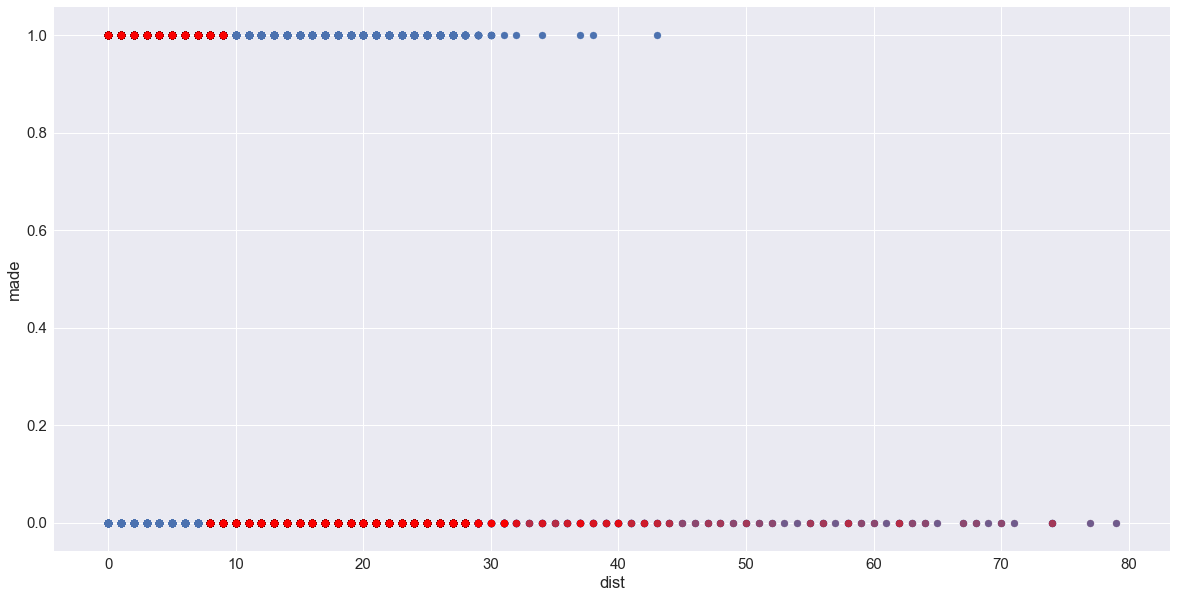

In [20]:
# scatter plot that includes the regression line
plt.scatter(kobe.shot_distance, kobe.shot_made_flag)
plt.scatter(kobe.shot_distance, kobe.pred, color='red', alpha=.2)
plt.xlabel('dist')
plt.ylabel('made')

The plot above plots the predicted and the truth (blue). Not very clear that this model is good, as it seems to just cut off.  Can improve the model by adding in additional columns that can help or hurt the data model. Perhaps do a test-train-split. 

## The following is a reminder of how the SciKit-Learn Models can be interfaced

In [21]:
from sklearn.linear_model import LogisticRegression as Model
# from sklearn.tree import DecisionTreeClassifier as Model
# from sklearn.ensemble import RandomForestClassifier as Model
model = Model()

from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )
from sklearn.metrics import *
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.4, random_state=0)

cross_validation.cross_val_score(model, X, y, cv=10)


/Users/user/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([ 0.59237651,  0.59354337,  0.59299611,  0.59688716,  0.61750973,
        0.58388478,  0.60334761,  0.60918645,  0.60140132,  0.58388478])

# Assignment

### Warmup. Perform some analysis on Kobe's shot selection. Ask and answer (with charts) questions such as: Does Kobe make more shots in the 4th quarter than on average? Does Kobe make more shots from the left more than the right? What was Kobe's best year for shooting percentage? Etc. The more naunced the more you'll have a feel for the data.

#### How many shots per quarter (period)? More in the 4th than the others?

In [22]:
kobe.period.value_counts()

3    7002
1    6700
4    6043
2    5635
5     280
6      30
7       7
Name: period, dtype: int64

In [23]:
kobe.shot_made_flag.value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

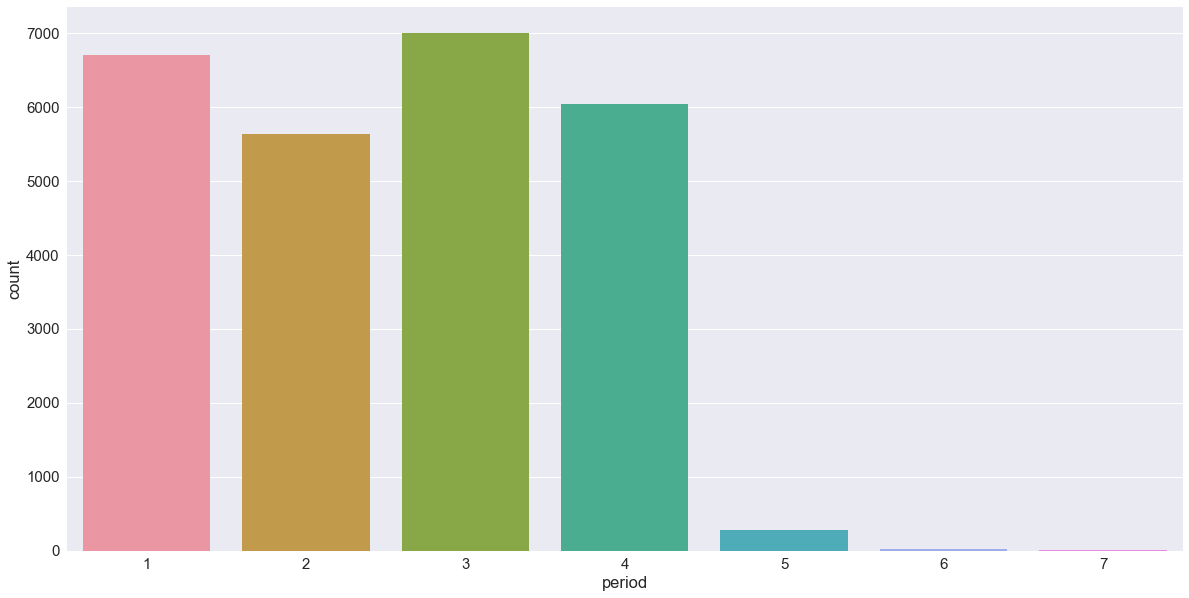

In [24]:
sns.countplot(x="period", data=kobe)

**Observation:** out of the total 25,697 shots made, it appears that kobe shoots most often in the 3rd and 1st period/quarter than the others. 

#### Which side does he favor to take his shots? Left or Right? 

In [25]:
kobe.shot_zone_area.value_counts()

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64

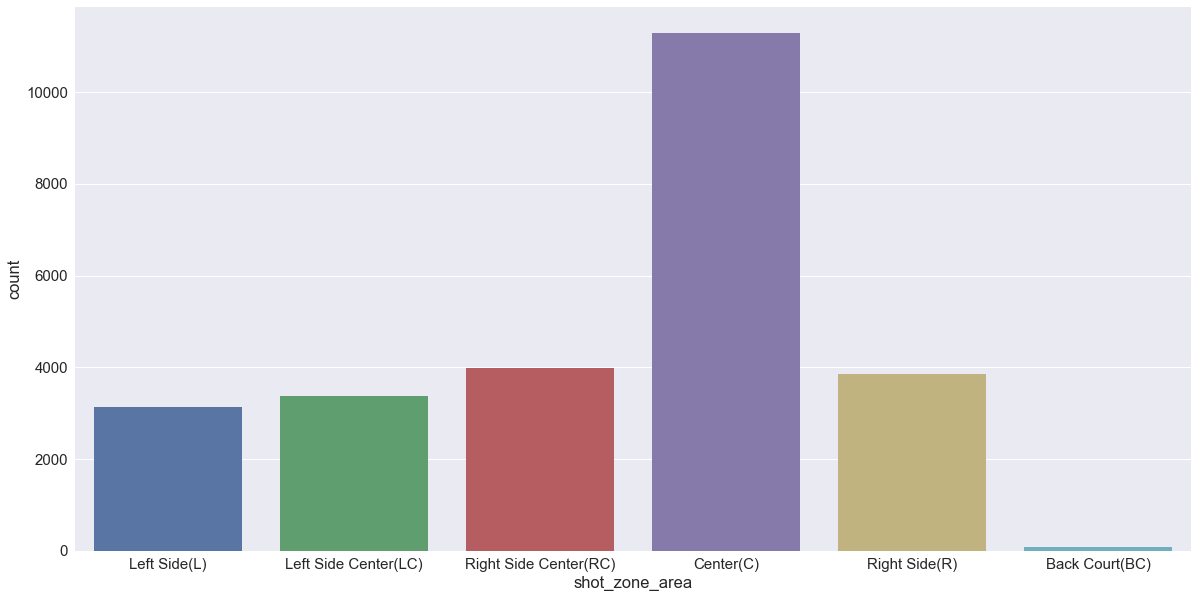

In [26]:
sns.countplot(x="shot_zone_area", data=kobe)

**Observation:** It appears that Kobe prefers to take the vast majority of his shots in the center. If he were to favor a side, it appears the right is slightly more favored than the left.  

#### Best year for shooting percentage? 

In [27]:
from pandas import Series, DataFrame

In [28]:
#split the game_date column (i.e., turn 2001-10-31 to 2001 10 31 using x.split)
kobe[['game_year', 'game_month', 'game_day']] = pd.DataFrame([ x.split('-') for x in kobe['game_date'].tolist() ])

In [29]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,team_id,team_name,game_date,matchup,opponent,shot_id,pred,game_year,game_month,game_day
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,0.0,2000,10,31
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,0.0,2000,10,31
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,0.0,2000,10,31
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,1.0,2000,10,31
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6,0.0,2000,10,31


In [30]:
kobe.game_year.value_counts()

2009    1655
2012    1578
2002    1565
2008    1504
2006    1485
2000    1434
2010    1383
2007    1343
2003    1330
2004    1246
2001    1178
2005    1071
2011     904
1999     817
2013     703
1997     521
2014     445
2016     445
2015     425
1998     420
1996      61
Name: game_year, dtype: int64

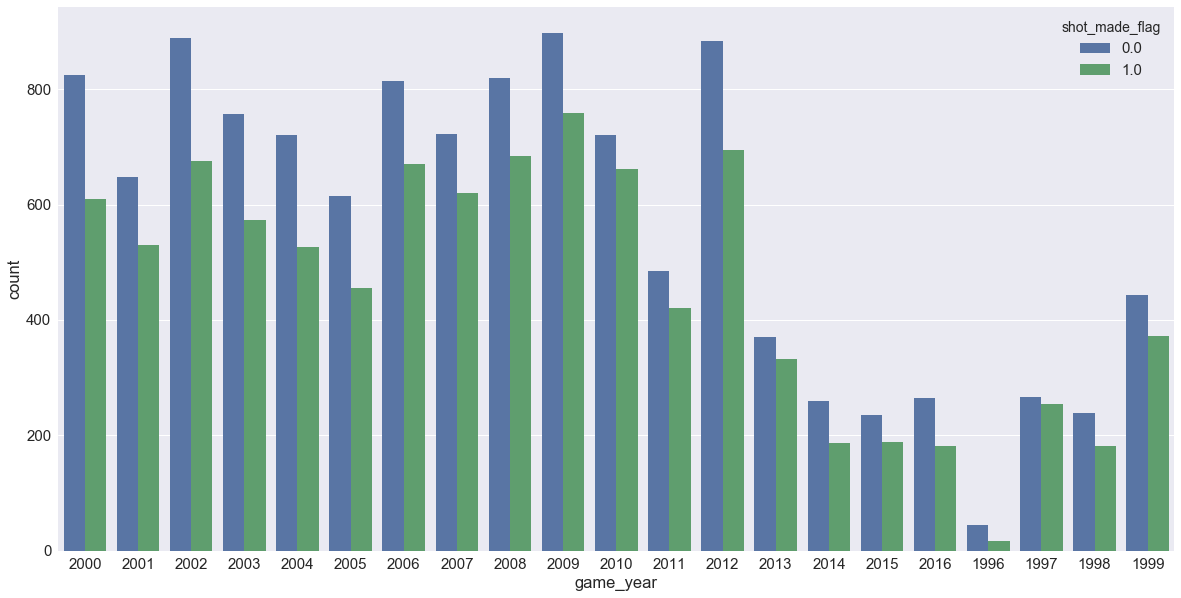

In [31]:
sns.countplot(x="game_year", hue='shot_made_flag', data=kobe)

**Observation:** I appears that Kobe's best years, for having a higher percentage of shots made, were 2009, 2012, and 2008 (2002 and 2006 weren't bad years comparatively). 

### 1. Create a new column called `abs_x` that is equal to the absolute value of loc_x. Plot a histogram of made shots and missed shots using this variable. Explain in detail (with graphics and evidence) why this could be a better feature/column to use in a Logsitic Regression model instead of `loc_x`.

In [32]:
#create a variable abs_x which is equal to the absolute value of loc(x). 
abs_x = kobe.loc_x.abs()

#add a new column to the kobe dataframe
kobe['abs_x'] = abs_x

In [33]:
#view new columns
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,team_name,game_date,matchup,opponent,shot_id,pred,game_year,game_month,game_day,abs_x
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,0.0,2000,10,31,157
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,0.0,2000,10,31,101
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,0.0,2000,10,31,138
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,1.0,2000,10,31,0
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6,0.0,2000,10,31,145


In [34]:
num_columns = [col for col, dtype in zip(kobe.columns, kobe.dtypes) if dtype != 'object']
num_columns #brings back columns with numerical values

['game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'team_id',
 'shot_id',
 'pred',
 'abs_x']

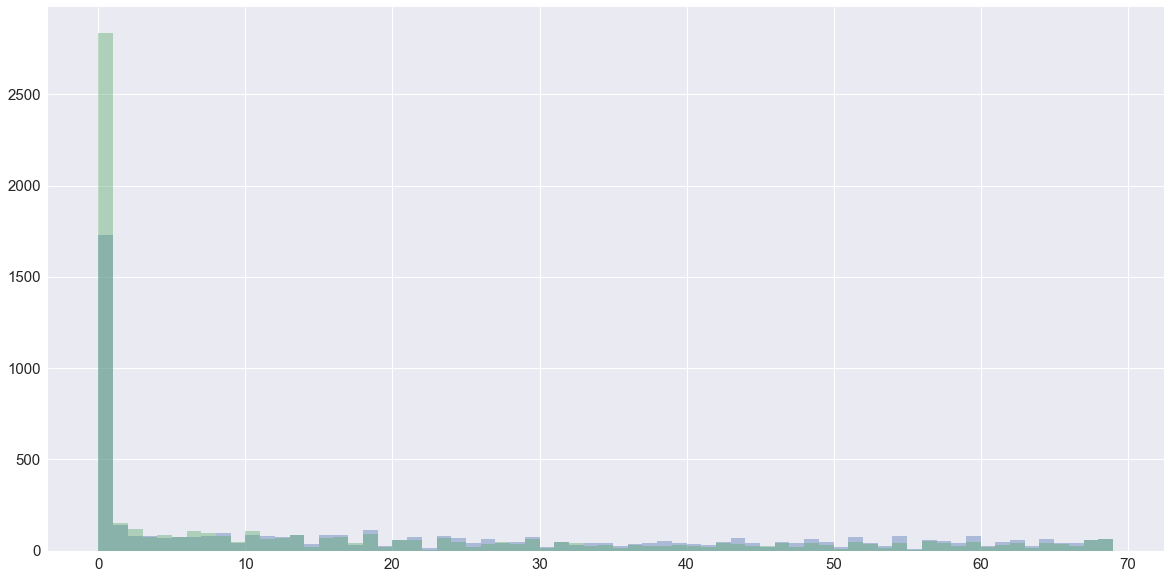

In [35]:
#plot a histogram of abs_x, based on values where 0= shot missed (blue) 1= shot made (green)

kobe[kobe.shot_made_flag==0].abs_x.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[kobe.shot_made_flag==1].abs_x.hist(bins=np.arange(0,70,1), alpha=.4)

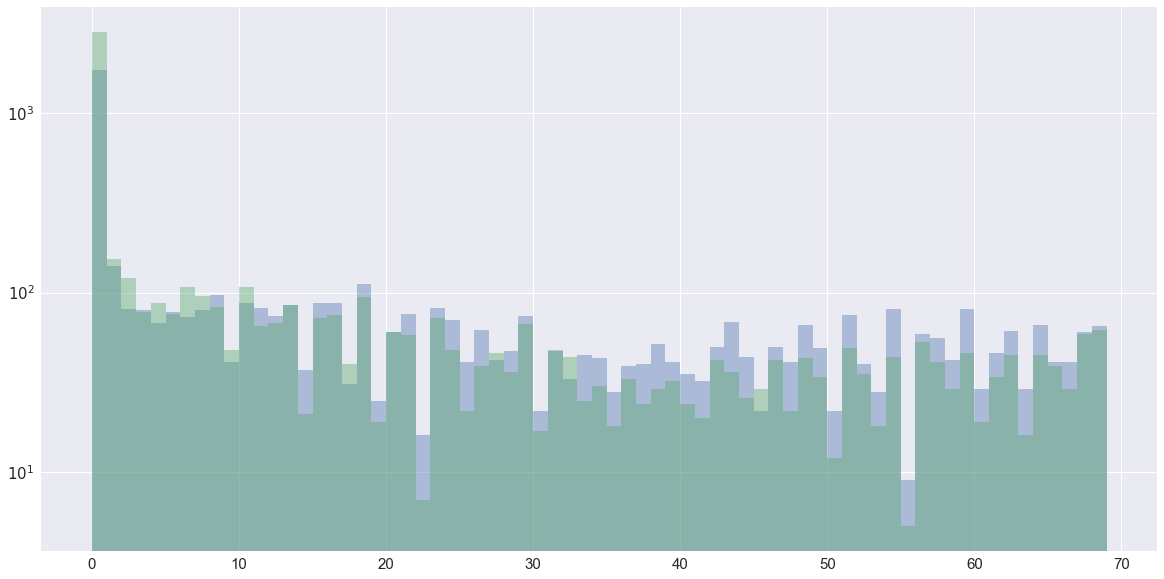

In [36]:
#plot a histogram of abs_x,on a log scale to see it in relative terms, based on values where 0= shot missed (blue) 1= shot made (green)
kobe[kobe.shot_made_flag==0].abs_x.hist(bins=np.arange(0,70,1), alpha=.4, log=True)
kobe[kobe.shot_made_flag==1].abs_x.hist(bins=np.arange(0,70,1), alpha=.4, log=True)

**Observation:** Using the absolute value of loc_X is a better feature for a logarithmic regression because we're determining how Kobe's location (distance) affects his ability to successfully make the shot. For the logistic regression model, it doesn't matter if he's on the right or left side of center.  So it's best to use the absolute value so you have better groupings of true distances from the hoop. See below results of the logistic regresion model fitted with loc_x vs. abs_x.

In [37]:
#model using loc_x

feature_cols = ['loc_x', 'minutes_remaining']
X = kobe[feature_cols]
y = kobe.shot_made_flag

model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())




0.55383896952951706

In [38]:
#model using abs_x

feature_cols = ['abs_x', 'minutes_remaining']
X = kobe[feature_cols]
y = kobe.shot_made_flag

model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())

0.59162548157372452

**Observation:** Even with just looking at the model's prediction results, you can see that the values are different. If we go with the model using the absolute value of loc_x, it appears that our accuracy with the model increases to 59.7%, rather than 55.4% with just using loc_x.

### 2.  Convert several (including ` ` ) string columns/features into numerical and attempt to use them in fitting a Logistic Regression model. Show histograms (similar to ones above) of made/missed of these new numerical features. Use these histograms to explain and justify why these features could improve the model

Take a look at the list of data types.  Let's convert combined_shot_type, shot_zone_area, and shot_type into numeric formats. 

In [39]:
kobe.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
pred                  float64
game_year              object
game_month             object
game_day               object
abs_x                   int64
dtype: object

In [40]:
kobe['shot_type'].unique()

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

In [41]:
#convert shot_type to numeric

def num_shot_type(shot_type):
    if shot_type == "2PT Field Goal":
        return 0
    elif shot_type == "3PT Field Goal":
        return 1

kobe.shot_type.apply(num_shot_type).head
kobe['num_shot_type'] = kobe.shot_type.apply(num_shot_type)
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,game_date,matchup,opponent,shot_id,pred,game_year,game_month,game_day,abs_x,num_shot_type
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2000-10-31,LAL @ POR,POR,2,0.0,2000,10,31,157,0
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2000-10-31,LAL @ POR,POR,3,0.0,2000,10,31,101,0
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2000-10-31,LAL @ POR,POR,4,0.0,2000,10,31,138,0
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2000-10-31,LAL @ POR,POR,5,1.0,2000,10,31,0,0
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2000-10-31,LAL @ POR,POR,6,0.0,2000,10,31,145,0


In [42]:
kobe['num_shot_type'].unique()

array([0, 1])

In [43]:
kobe['combined_shot_type'].unique()

array(['Jump Shot', 'Dunk', 'Layup', 'Tip Shot', 'Hook Shot', 'Bank Shot'], dtype=object)

In [44]:
#convert combined_shot_type to numeric

def num_combined_shot_type(combined_shot_type):
    if combined_shot_type == "Jump Shot":
        return 0
    elif combined_shot_type == "Dunk":
        return 1
    elif combined_shot_type == "Layup":
        return 2
    elif combined_shot_type == "Tip Shot":
        return 3
    elif combined_shot_type == "Hook Shot":
        return 4
    elif combined_shot_type == "Bank Shot":
        return 5
kobe.combined_shot_type.apply(num_combined_shot_type).head
kobe['num_combined_shot_type'] = kobe.combined_shot_type.apply(num_combined_shot_type)
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,matchup,opponent,shot_id,pred,game_year,game_month,game_day,abs_x,num_shot_type,num_combined_shot_type
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,LAL @ POR,POR,2,0.0,2000,10,31,157,0,0
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,LAL @ POR,POR,3,0.0,2000,10,31,101,0,0
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,LAL @ POR,POR,4,0.0,2000,10,31,138,0,0
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,LAL @ POR,POR,5,1.0,2000,10,31,0,0,1
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,LAL @ POR,POR,6,0.0,2000,10,31,145,0,0


In [45]:
kobe['num_combined_shot_type'].unique()

array([0, 1, 2, 3, 4, 5])

In [46]:
#convert shot_zone_area to numeric

def num_shotzone_area(shot_zone_area):
    if shot_zone_area == "Left Side(L)":
        return 0
    elif shot_zone_area == "Left Side Center(LC)":
        return 1
    elif shot_zone_area == "Right Side Center(RC)":
        return 2
    elif shot_zone_area == "Center(C)":
        return 3
    elif shot_zone_area == "Right Side(R)":
        return 4
    elif shot_zone_area == "Back Court(BC)":
        return 5
kobe.shot_zone_area.apply(num_shotzone_area).head
kobe['num_shot_zone_area'] = kobe.shot_zone_area.apply(num_shotzone_area)
kobe.head()


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,opponent,shot_id,pred,game_year,game_month,game_day,abs_x,num_shot_type,num_combined_shot_type,num_shot_zone_area
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,POR,2,0.0,2000,10,31,157,0,0,0
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,POR,3,0.0,2000,10,31,101,0,0,1
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,POR,4,0.0,2000,10,31,138,0,0,2
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,POR,5,1.0,2000,10,31,0,0,1,3
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,POR,6,0.0,2000,10,31,145,0,0,0


In [47]:
kobe['num_shot_zone_area'].unique()

array([0, 1, 2, 3, 4, 5])

In [48]:
kobe.dtypes

action_type                object
combined_shot_type         object
game_event_id               int64
game_id                     int64
lat                       float64
loc_x                       int64
loc_y                       int64
lon                       float64
minutes_remaining           int64
period                      int64
playoffs                    int64
season                     object
seconds_remaining           int64
shot_distance               int64
shot_made_flag            float64
shot_type                  object
shot_zone_area             object
shot_zone_basic            object
shot_zone_range            object
team_id                     int64
team_name                  object
game_date                  object
matchup                    object
opponent                   object
shot_id                     int64
pred                      float64
game_year                  object
game_month                 object
game_day                   object
abs_x         

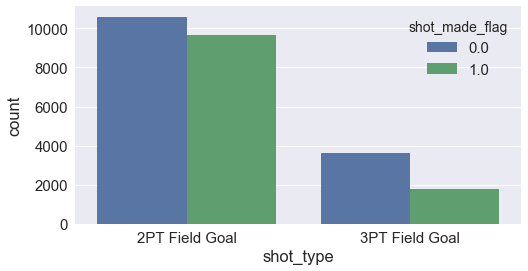

In [49]:
plt.figure(figsize=(8,4))
sns.countplot(x="shot_type", hue="shot_made_flag", data=kobe)


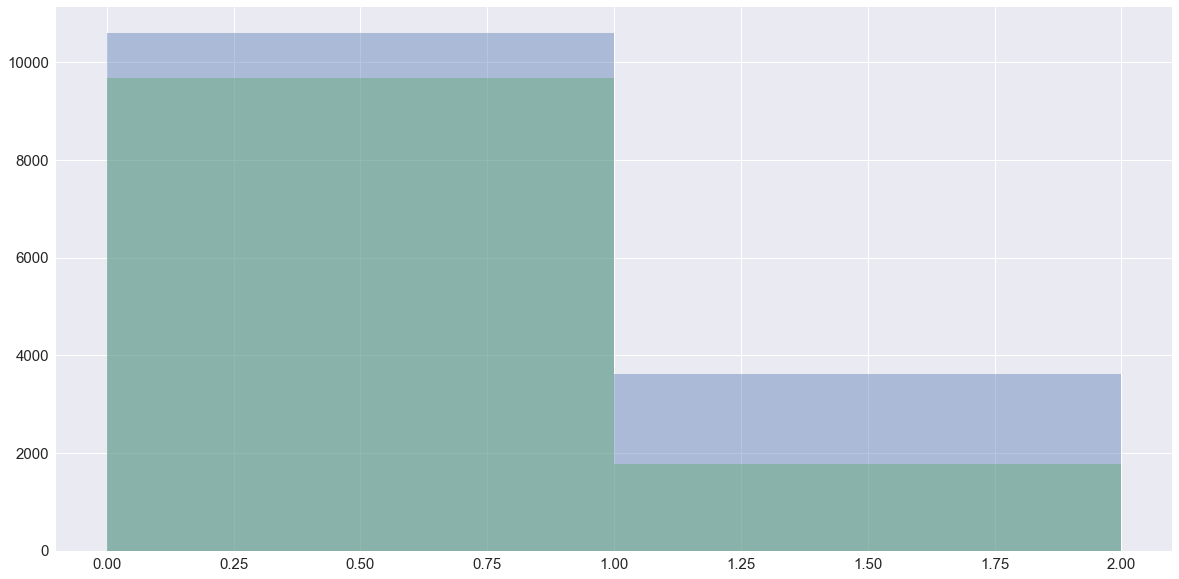

In [50]:
#plot a histogram of num_shot_type, based on values where 0= shot missed (blue) 1= shot made (green)

kobe[kobe.shot_made_flag==0].num_shot_type.hist(bins=np.arange(0,3,1), alpha=.4)
kobe[kobe.shot_made_flag==1].num_shot_type.hist(bins=np.arange(0,3,1), alpha=.4)

**Observation:** Looking at the histogram of the shot type, it appears that Kobe makes more shots at the 2PT Field Goal than the 3PT Field Goal. Additionally, he's relatively more successful at making shots from this point rather than the 3PT Field Goal (where he's missing about half of them).

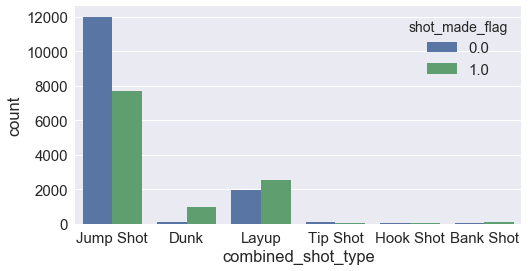

In [51]:
plt.figure(figsize=(8,4))
sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=kobe)


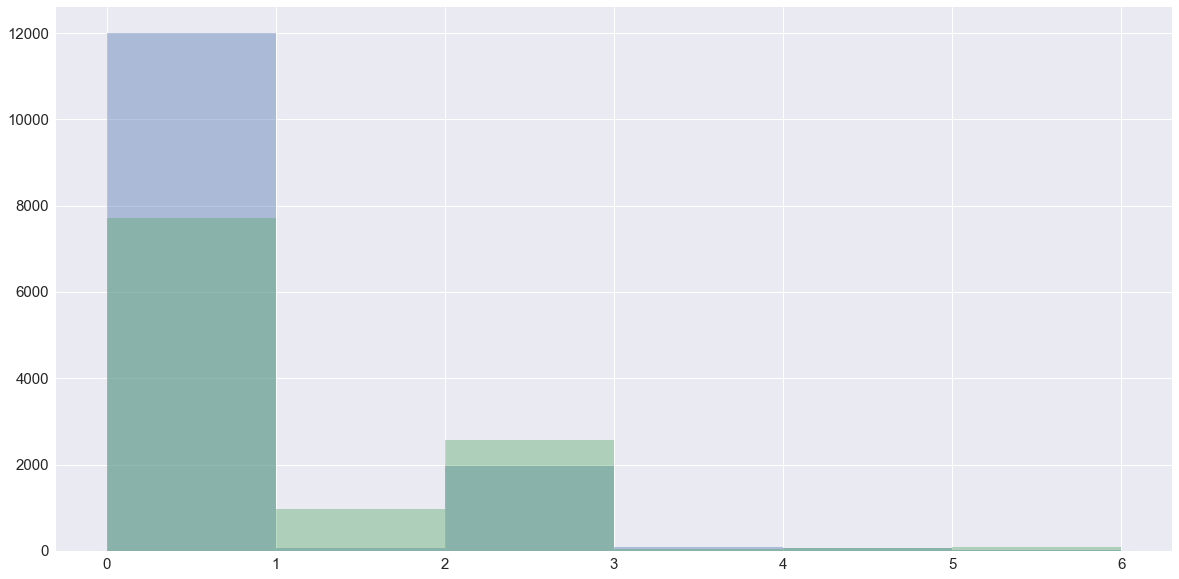

In [52]:
#plot a histogram of num_combined_shot_type, based on values where 0= shot missed (blue) 1= shot made (green)

kobe[kobe.shot_made_flag==0].num_combined_shot_type.hist(bins=np.arange(0,7,1), alpha=.4)
kobe[kobe.shot_made_flag==1].num_combined_shot_type.hist(bins=np.arange(0,7,1), alpha=.4)

**Observation:** It's a bit difficult to decipher in this histogram, but it appears that Kobe makes most of his shots as jump shots, but his rate of success is much higher for dunks (makes sense) and layups.

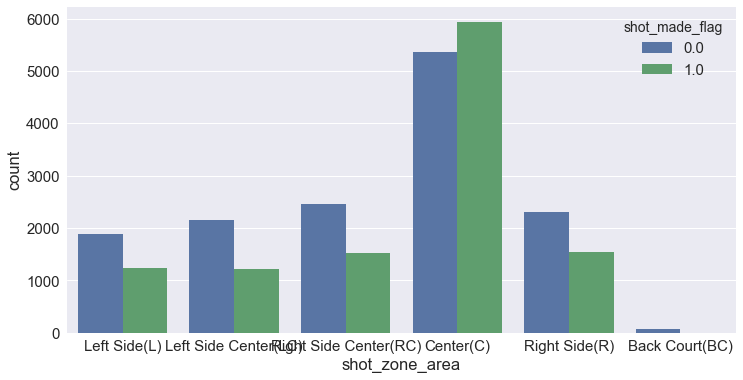

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=kobe)


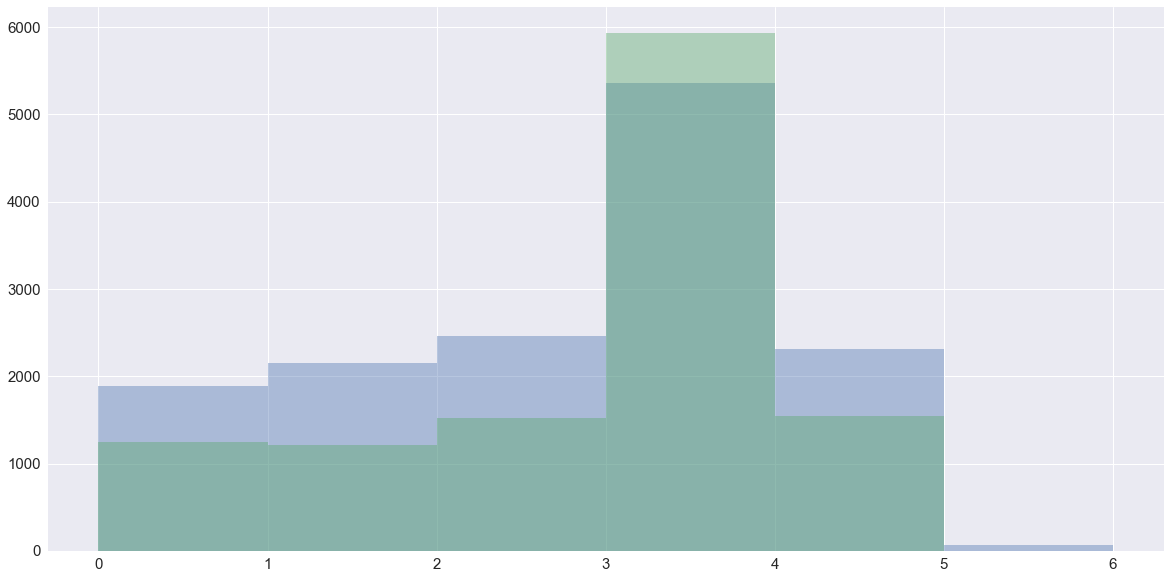

In [54]:
#plot a histogram of num_shot_zone_area, based on values where 0= shot missed (blue) 1= shot made (green)

kobe[kobe.shot_made_flag==0].num_shot_zone_area.hist(bins=np.arange(0,7,1), alpha=.4)
kobe[kobe.shot_made_flag==1].num_shot_zone_area.hist(bins=np.arange(0,7,1), alpha=.4)

**Observation:** Kobe is most successful when shooting from the center; he's able to get in more shots than missing shots. This makes sense where his most successful types of shots are dunks or layups, which require coming down the middle of the court. He is better on any right side shots than his left (though it's not much of a difference between the two). 

### Using the new numeric features for the model. See how our predictions do.

In [55]:
#model using abs_x and our numeric features

feature_cols = ['abs_x', 'minutes_remaining', 'num_shot_type']
X = kobe[feature_cols]
y = kobe.shot_made_flag

model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())

0.59602288204848819

In [56]:
#model using abs_x and our numeric features

feature_cols = ['abs_x', 'minutes_remaining', 'num_shot_type', 'num_shot_zone_area']
X = kobe[feature_cols]
y = kobe.shot_made_flag

model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())

0.59621745729073428

In [57]:
#model using abs_x and our numeric features

feature_cols = ['abs_x', 'minutes_remaining', 'num_shot_type', 'num_combined_shot_type', 'num_shot_zone_area']
X = kobe[feature_cols]
y = kobe.shot_made_flag

model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())

0.61298984317235472

**For the Model:** These now numeric features (shot_type, shot_zone_area, and combined_shot_type) will help us refined our model and improve our accuracy in the model. As you can see our accuracy improved rom 59% to 61% when we incorporated the additonal features, incrementally growing as we added more features into the model. By refining *how* Kobe takes his shots (what type of shot and where he's making the shot) and using the history to observe *when* he's most successful, we are better able to predict if our model is going to be more accurate in its predictions of Kobe making shots rather than missing them. 

### 3. Show a 3 dimensional surface plot [https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#surface-plots] of probabilities from a trained Logistic Regression model using only `abs_x` and `loc_y`. The probabilities arise from a distributed grid of `x` values and `y` values as input to the `predict_proba()` function.

In [58]:
#model using abs_x and loc_y
from sklearn.linear_model import LogisticRegression as Model

feature_cols = ['abs_x', 'loc_y']
X = kobe[feature_cols]
y = kobe.shot_made_flag

model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())

0.59773514418025453

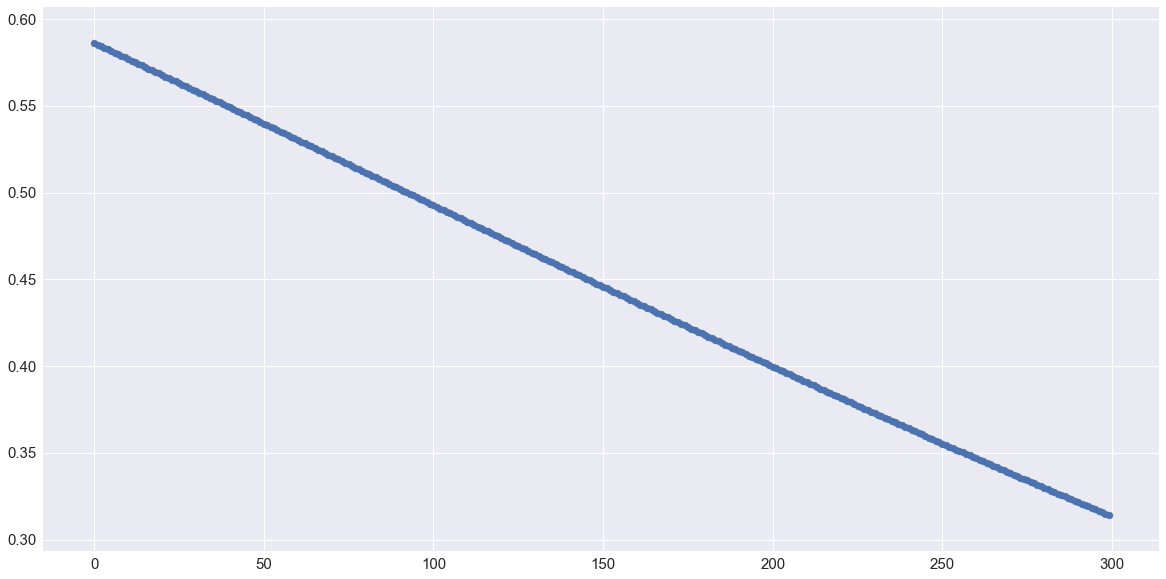

In [59]:
model.fit(X, y)
kobe['pred'] = model.predict(X)

basket_location = np.arange(0,300)
feet = np.array([0]*300)
x_trial = np.column_stack((basket_location, feet))

model.predict_proba(x_trial)
plt.scatter(basket_location, model.predict_proba(x_trial)[:,1])


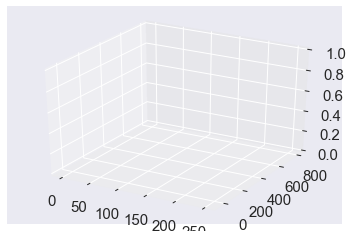

In [61]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X1 = kobe.abs_x
y1 = kobe.loc_y
Z1 = kobe.pred

ax.plot_surface(X1,y1,Z1, color='r')

plt.show()


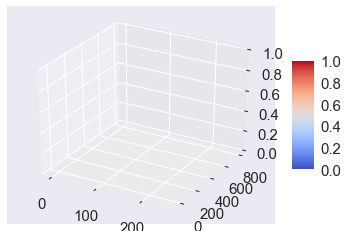

In [62]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X1 = kobe.abs_x
y1 = kobe.loc_y
Z1 = kobe.pred

# Plot the surface.
surf = ax.plot_surface(X1,y1,Z1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0,1)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

**Note:** Having difficulty plotting the features, despite troubleshooting. It worked once, but when I reset the kernel it didn't plot again (and I tried resetting kernel). 